<a href="https://colab.research.google.com/github/ADRdatasci/Data-Science-Notebooks/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pystan~=2.14 #install dependencies - pystan 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 118 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
!pip install fbprophet #install dependencies - fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637488 sha256=999a823979d1eaac7b7cb62d0a1ec0423ea75ea1043ba8b7b9eb37fb42c103c3
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("stock_data.csv")

In [ ]:
data = data[["Date", "Close"]]

In [ ]:
data

,Date,Close
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
709,2022-10-25,222.419998
710,2022-10-26,224.639999
711,2022-10-27,225.089996
712,2022-10-28,228.520004


In [ ]:
data.columns = ["ds", "y"] # rename columns
data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
709,2022-10-25,222.419998
710,2022-10-26,224.639999
711,2022-10-27,225.089996
712,2022-10-28,228.520004


In [ ]:
from fbprophet import Prophet

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

In [ ]:
future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

In [ ]:
from fbprophet.plot import plot_plotly

In [ ]:
plot_plotly(prophet, predictions)

In [ ]:
unknown_data = data.iloc[-90:] #training data on the last 90 unknown days 
data = data.iloc[:-90]

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = (prophet.make_future_dataframe(periods=365))
predictions = prophet.predict(future_dates)

In [ ]:
plot_plotly(prophet, predictions)

In [30]:
import matplotlib.pyplot as plt

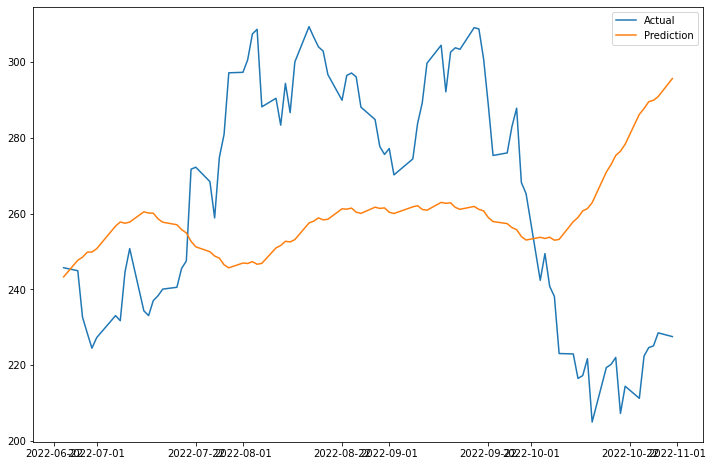

In [37]:
plt.figure(figsize=(12,8))

pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label="Actual")
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label="Prediction")

plt.legend()